---
# Mini kaggle : 기상 조건에 따른 자전거 대여량 예측
  - 사람들이 자전거를 빌릴 때 영향을 주지 않는 요소는 무엇인지

---
# Module import

In [1]:
from google.colab import drive
drive.mount('/content/drive')
data_dir = '/content/drive/MyDrive/Datathon/data'

data_dir_path = data_dir + "/toy"

Mounted at /content/drive


In [5]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline
plt.style.use('ggplot')
sns.set(font_scale=2.5)
mpl.rcParams['axes.unicode_minus'] = False

import missingno as msno
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

---
# Dataset check

## CSV read

In [7]:
train = pd.read_csv(data_dir_path + '/train.csv')
train.shape

(1459, 11)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [10]:
train.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

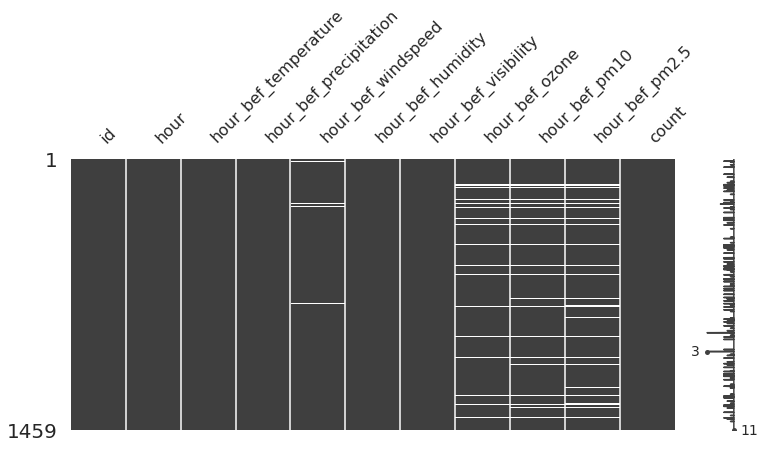

In [11]:
msno.matrix(train, figsize=(12,5))